**모델 개요** : k-최근접 이웃 회귀를 사용해서 농어의 무게를 예측했을 때 발생하는 큰 문제는 훈련 세트 범위 밖의 샘플을 예측할 수 없다는 점이다. k-최근접 이웃 회귀는 아무리 멀리 떨어져 있더라도 무조건 가까운 샘플의 타깃을 평균하여 예측한다.   
이 문제를 해결하기 위해 선형 회귀를 사용한다. 선형 회귀는 훈련 세트에 잘 맞는 직선의 방정식을 찾는 것이다. 가장 잘 맞는 직선의 방정식을 찾는다는 것은 최적의 기울기와 절편을 구한다는 의미이다. 하지만 모델이 단순하여 농어의 무게가 음수가 나올 수 있다.  
이를 해결하기 위해 다항 회귀를 사용했다. 농어의 길이를 제곱하여 훈련 세트에 추가한 다음 선형 회귀 모델을 다시 훈련시킨다. 이 모델은 2차 방정식의 그래프 형태를 학습하였고 테스트 성능이 단순 선형 회귀보다 훨씬 높아졌다.

### **선형 회귀 (Linear Regression)**
특성이 하나인 경우 어떤 직선을 학습하는 알고리즘 중 하나.
sklearn.linear_model 패키지 안에 LinearRegression 클래스로 선형 회귀 알고리즘을 구현해 놓음.

### **다항 회귀 (polynomial regression)**

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.9746459963987609

In [5]:
print(knr.predict([[50]]))

[1033.33333333]


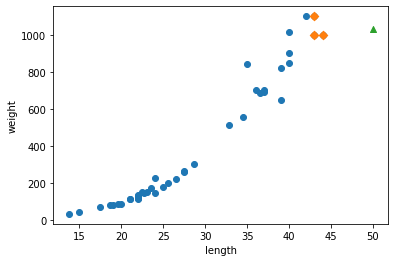

In [6]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
print(np.mean(train_target[indexes]))   # 예측값과 정확히 일치

1033.3333333333333


k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다. 따라서 엄청 큰 길이를 대입 하더라도 예측값은 1033이 나온다.

In [8]:
print(knr.predict([[100]]))

[1033.33333333]


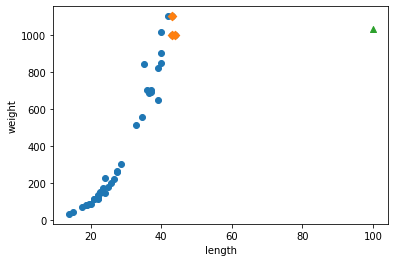

In [9]:
# 100cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-최근접 이웃 알고리즘의 한계

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 학습한다.
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측한다.
print(lr.predict([[50]]))

[1241.83860323]


In [11]:
print(lr.coef_, lr.intercept_)    # 기울기와 y절편

[39.01714496] -709.0186449535477


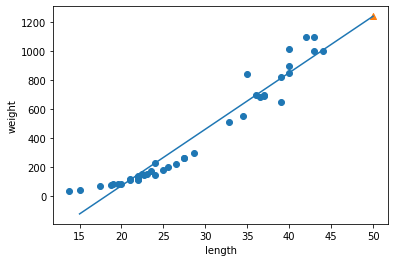

In [12]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


다항 회귀를 사용하기 위해 훈련 세트에 제곱을 한 항을 추가해준다.

In [14]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [15]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [16]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [17]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


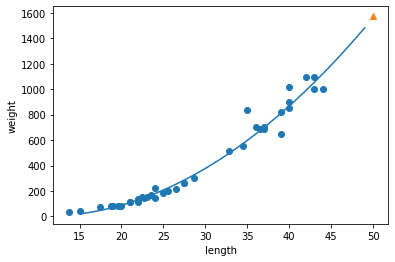

In [18]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그린다.
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
print('train_score : ', lr.score(train_poly, train_target))
print('test_score : ', lr.score(test_poly, test_target))

train_score :  0.9706807451768623
test_score :  0.9775935108325122


약간의 과소적합이 남아있음을 볼 수 있다.